## Calculating the Return of a Portfolio of 5 Top banks in India based on market capitalisation

In [15]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [22]:
tickers = ['SBIN.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'KOTAKBANK.NS', 'AXISBANK.NS']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='2013-1-1')['Adj Close']

In [23]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2369 entries, 2013-01-01 to 2022-08-05
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SBIN.NS       2369 non-null   float64
 1   HDFCBANK.NS   2369 non-null   float64
 2   ICICIBANK.NS  2369 non-null   float64
 3   KOTAKBANK.NS  2369 non-null   float64
 4   AXISBANK.NS   2369 non-null   float64
dtypes: float64(5)
memory usage: 111.0 KB


In [24]:
mydata.head()

,SBIN.NS,HDFCBANK.NS,ICICIBANK.NS,KOTAKBANK.NS,AXISBANK.NS
Date,,,,,
2013-01-01,221.025620,319.210480,187.390274,323.220856,258.072083
2013-01-02,223.220886,320.539551,189.905670,326.677124,262.645630
2013-01-03,225.138336,318.674225,189.590195,325.682495,263.232697
2013-01-04,226.513794,316.808838,191.264450,323.345184,261.149536
2013-01-07,224.773972,311.609131,191.223969,322.474854,259.994324


In [25]:
mydata.tail()

,SBIN.NS,HDFCBANK.NS,ICICIBANK.NS,KOTAKBANK.NS,AXISBANK.NS
Date,,,,,
2022-08-01,533.750000,1446.150024,823.400024,1855.750000,730.799988
2022-08-02,542.099976,1430.250000,817.750000,1884.599976,730.450012
2022-08-03,540.849976,1433.599976,824.799988,1851.099976,730.500000
2022-08-04,533.250000,1431.900024,820.250000,1835.550049,721.599976
2022-08-05,531.049988,1427.050049,838.200012,1833.900024,728.500000


Normalization 

In [26]:
mydata.iloc[0]

SBIN.NS         221.025620
HDFCBANK.NS     319.210480
ICICIBANK.NS    187.390274
KOTAKBANK.NS    323.220856
AXISBANK.NS     258.072083
Name: 2013-01-01 00:00:00, dtype: float64

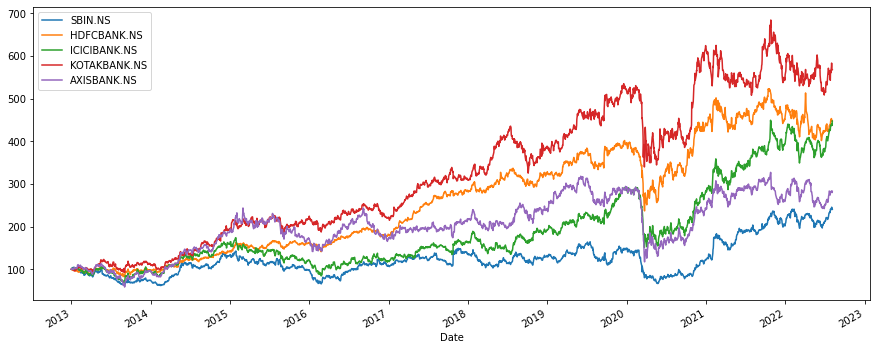

In [27]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

### Calculating the Return of a Portfolio of Securities

In [28]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,SBIN.NS,HDFCBANK.NS,ICICIBANK.NS,KOTAKBANK.NS,AXISBANK.NS
Date,,,,,
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,0.009932,0.004164,0.013423,0.010693,0.017722
2013-01-03,0.008590,-0.005819,-0.001661,-0.003045,0.002235
2013-01-04,0.006109,-0.005854,0.008831,-0.007177,-0.007914
2013-01-07,-0.007681,-0.016413,-0.000212,-0.002692,-0.004424


In [29]:
weights = np.array([0.20, 0.20, 0.20, 0.20, 0.20])

In [30]:
annual_returns = returns.mean() * 250
annual_returns

SBIN.NS         0.153217
HDFCBANK.NS     0.186445
ICICIBANK.NS    0.215680
KOTAKBANK.NS    0.222992
AXISBANK.NS     0.175723
dtype: float64

In [31]:
np.dot(annual_returns, weights)

0.19081140682889244

Transform the result into a percentage form. 

In [32]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print (pfolio_1)

19.081 %
